In [38]:
# lib imports
import os
import time
import tqdm
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import json
import joblib
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats.contingency import crosstab
import argparse
from sklearn import preprocessing

# custom imports
sys.path.append(os.path.expanduser('~'))
sys.path.append(os.getcwd())
from functions.load_model import load_tolist
import functions.process as proc
from functions.io import setup_logger, makedir
from functions.read_write import NpIntEncoder
from functions import FeatureEngine
from functions.plots_prediction import ethogram_plotter, CLtrajectory_plotter, transition_plotter
import functions.algebra as al

In [75]:
# %% SETTINGS
# set invalid (division by zero error) to ignore
np.seterr(invalid='ignore')
date = time.strftime("%Y%m%d")
datestr = time.strftime("%Y%m%d-%HH%MM")
newline = '\n'
sklearn.set_config(transform_output="pandas")


# %% Configuration
config = yaml.safe_load(open("config.yml", "r"))

config_batch_path = "config_batch.yml"
config_batch = yaml.safe_load(open(config_batch_path, "r"))
# %% INPUT
list_inpath_pattern = config_batch['Experiments'][config_batch['Settings']['run']]['conditions']

# recording
fps = config['settings']['fps']

# path
inpath = config['path']['PharaGlow data']
inpath_with_subfolders = config['path']['with subfolders']

# coloring and labels
cluster_color = config['cluster_color']
cluster_label = config['cluster_labels']
skip_already = config['settings']['skip_already']
"""
for inpath_pattern in list_inpath_pattern:
    # %% I/O
    # create list of inpath from folders in inpath that folder names contain inpath_pattern
    if inpath_with_subfolders:
        new_inpath = [os.path.join(inpath, sub) for sub in os.listdir(inpath) if inpath_pattern in sub]
    else:
        new_inpath = [inpath]
    outpath = f'/gpfs/soma_fs/home/boeger/PpaPred/temp/{inpath_pattern}'

    base_outpath = makedir(outpath)
    outpath = []
    for p in new_inpath:
        in_folder = os.path.basename(p)
        outpath.append(makedir(os.path.abspath(os.path.join(base_outpath,in_folder))))
    
    if False:
        XYs, CLines  = FeatureEngine.run(new_inpath, 
                                     outpath,
                                     return_XYCLine = True, 
                                     skip_engine = False, 
                                     skip_already=False, 
                                     out_fn_suffix='features',
                                     inpath_with_subfolders=inpath_with_subfolders)"""

  0%|          | 0/136 [00:00<?, ?it/s]

feature calculation for L147_240523_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [range(7972, 7991), range(7992, 7996)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 7972)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([6569, 6606, 6607, 6609]),)
Ffill-Interpolation of nan frames


  1%|          | 1/136 [00:03<07:35,  3.37s/it]



feature calculation for L147_240523_L147_results_75.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2483, 2484), range(2485, 2487), range(2496, 2497), range(2500, 2501)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 284)
split 1, range: (317, 351)
split 2, range: (363, 491)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (495, 853)
split 4, range: (854, 1931)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([777, 778]),)
split 5, range: (1943, 2304)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (2308, 2477)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(284, 317) (over 1 sec long)


  1%|▏         | 2/136 [00:05<05:26,  2.44s/it]



feature calculation for L147_240523_L147bis_results_151.json_labeldata.csv
Area larger than threshold, collision assumed in [range(4216, 4217), range(4222, 4223)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (18, 49)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (54, 324)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (356, 496)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (509, 4216)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3403, 3404, 3693, 3694]),)
split 4, range: (4223, 8076)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1705, 1707, 1710, 1873, 1909, 1919, 1920, 1927, 1929, 1931, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1991, 1994, 1995, 2159, 2411,
       2412, 2413, 2414, 2415, 2416, 2419, 2420, 2447, 2479, 2491, 2492,
       2493, 2494, 2495, 2496]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(324, 356) (over 1 sec long)


  2%|▏         | 3/136 [00:08<06:47,  3.07s/it]



feature calculation for L147_240523_L147_results_49.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1869)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1869, 1938) (over 1 sec long)


  3%|▎         | 4/136 [00:09<04:58,  2.26s/it]



feature calculation for L147_240523_L147_results_29.json_labeldata.csv
Area larger than threshold, collision assumed in [range(142, 143), range(217, 238), range(531, 541), range(1981, 2003)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (45, 142)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (154, 192)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([15, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37]),)
split 2, range: (238, 407)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (452, 497)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([38]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (544, 730)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (754, 854)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (880, 1726)
split 7, range: (1733, 1962)
split 8, range: (2037, 2151)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
  4%|▎         | 5/136 [00:11<04:24,  2.02s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 45) (over 1 sec long)
Exempted from interpolation: range(192, 238) (over 1 sec long)
Exempted from interpolation: range(407, 452) (over 1 sec long)
Exempted from interpolation: range(497, 544) (over 1 sec long)
Exempted from interpolation: range(1962, 2037) (over 1 sec long)


feature calculation for L147_240523_L147_results_41.json_labeldata.csv
Area larger than threshold, collision assumed in [range(56, 92), range(633, 635), range(648, 649), range(655, 674), range(3394, 3481), range(3490, 3492)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (92, 181)
split 1, range: (184, 226)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (257, 633)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([370, 374]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (693, 1103)
split 4, range: (1123, 3029)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 161,  164,  165,  166,  167, 1056, 1094, 1095, 1096, 1097, 1098]),)
split 5, range: (3100, 3133)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([32]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (3141, 3394)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 92) (over 1 sec long)
Exempted from interpolation: range(226, 257) (over 1 sec long)
Exempted from interpolation: range(633, 693) (over 1 sec long)
Exempted from interpolation: range(3029, 3100) (over 1 sec long)
Exempted from interpolation: range(3394, 3492) (over 1 sec long)


  4%|▍         | 6/136 [00:13<04:21,  2.01s/it]



feature calculation for L147_240523_L147_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([   75,   105, 11419, 11422, 11423, 11424, 11425, 11429, 11430,
       11441, 11444, 11445, 11446, 11447]),)
Ffill-Interpolation of nan frames


  5%|▌         | 7/136 [00:21<08:15,  3.84s/it]



feature calculation for L147_240523_L147_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [range(9035, 9040), range(9041, 9042), range(9061, 9066), range(14853, 14860), range(14863, 14864), range(14895, 14899), range(14954, 14970)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 8038)
split 1, range: (8039, 8662)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([620, 621, 622]),)
split 2, range: (8663, 9035)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (9066, 14853)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2906, 2907, 2908, 2909, 2910, 2911, 2989, 3037, 3038, 3039, 3480,
       3481, 3482, 3483, 3484, 3485, 3486, 3487, 3490, 3497, 3854, 3866,
       3867, 3868, 3871, 3872, 3877, 5062, 5063, 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(9035, 9066) (over 1 sec long)


  6%|▌         | 8/136 [00:29<11:01,  5.17s/it]



feature calculation for L147_240523_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 7046,  7047,  7048, ..., 17996, 17997, 17998]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


  7%|▋         | 9/136 [00:36<12:36,  5.96s/it]



feature calculation for L147_240523_L147_results_37.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1805)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1246, 1247, 1261, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1278,
       1280]),)


  7%|▋         | 10/136 [00:37<09:14,  4.40s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240523_L147bis_results_166.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6517)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 372,  373,  374, ..., 6514, 6515, 6516]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


  8%|▊         | 11/136 [00:40<08:06,  3.89s/it]



feature calculation for L147_240523_L147_results_9.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3889)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 306,  312,  313,  317, 2758, 2759]),)
Ffill-Interpolation of nan frames


  9%|▉         | 12/136 [00:42<06:41,  3.24s/it]



feature calculation for L147_240523_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4383)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 164, 1584, 1800]),)
Ffill-Interpolation of nan frames


 10%|▉         | 13/136 [00:44<05:49,  2.84s/it]



feature calculation for L147_240523_L147_results_67.json_labeldata.csv
Area larger than threshold, collision assumed in [range(63, 64), range(65, 66), range(76, 77), range(304, 306), range(325, 334), range(646, 647), range(890, 894), range(1234, 1246), range(1251, 1283), range(1374, 1376), range(1377, 1378), range(1379, 1394), range(1397, 1398), range(1405, 1413), range(1414, 1415), range(1422, 1434)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 63)
split 1, range: (77, 304)
split 2, range: (334, 646)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (647, 890)
split 4, range: (894, 967)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 5, range: (1021, 1099)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (1100, 1167)
split 7, range: (1168, 1234)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 8, range: (1287, 1374)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (1474, 1544)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 10, range: (1545, 1620)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 11, range: (1629, 2169)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(967, 1021) (over 1 sec long)
Exempted from interpolation: range(1234, 1287) (over 1 sec long)
Exempted from interpolation: range(1374, 1474) (over 1 sec long)


 10%|█         | 14/136 [00:46<05:11,  2.55s/it]



feature calculation for L147_240523_L147_results_57.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 8343)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2778, 2780, 2784, 2818, 5009, 5044]),)
Ffill-Interpolation of nan frames


 11%|█         | 15/136 [00:49<05:49,  2.89s/it]



feature calculation for L147_240523_L147_results_42.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1352, 1353)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1087)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 1, range: (1125, 1352)
split 2, range: (1353, 2349)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1087, 1125) (over 1 sec long)


 12%|█▏        | 16/136 [00:51<04:49,  2.41s/it]



feature calculation for L147_240523_L147bis_results_153.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1641)
split 1, range: (1665, 2898)
Ffill-Interpolation of nan frames


 12%|█▎        | 17/136 [00:52<04:12,  2.13s/it]



feature calculation for L147_240523_L147_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 15221)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 3788,  3789,  3792, ..., 15218, 15219, 15220]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 13%|█▎        | 18/136 [00:58<06:43,  3.42s/it]



feature calculation for L147_240523_L147_results_51.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (2, 10002)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([650, 997]),)
Ffill-Interpolation of nan frames


 14%|█▍        | 19/136 [01:03<07:09,  3.67s/it]



feature calculation for L147_240417_L147_results_43.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3150)
split 1, range: (3159, 3208)
Ffill-Interpolation of nan frames


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 15%|█▍        | 20/136 [01:04<05:54,  3.05s/it]



feature calculation for L147_240417_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  164,  2141,  2142,  3512,  3553, 16576]),)
Ffill-Interpolation of nan frames


 15%|█▌        | 21/136 [01:12<08:24,  4.39s/it]



feature calculation for L147_240417_L147_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Ffill-Interpolation of nan frames


 16%|█▌        | 22/136 [01:19<10:09,  5.35s/it]



feature calculation for L147_240417_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 61)
split 1, range: (119, 895)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([335, 336, 337, 341, 342, 343]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (941, 1776)
split 3, range: (1791, 1879)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([82, 83]),)
split 4, range: (1887, 7707)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(61, 119) (over 1 sec long)
Exempted from interpolation: range(895, 941) (over 1 sec long)


 17%|█▋        | 23/136 [01:23<09:07,  4.85s/it]



feature calculation for L147_240417_L147_results_17.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1882)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1436, 1439]),)


 18%|█▊        | 24/136 [01:24<06:50,  3.67s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240417_L147_results_58.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2613)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 722,  723,  724, ..., 2610, 2611, 2612]),)
Ffill-Interpolation of nan frames


 18%|█▊        | 25/136 [01:25<05:26,  2.94s/it]



feature calculation for L147_240510_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1106)
split 1, range: (1131, 3180)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2035, 2041, 2045, 2046]),)
split 2, range: (3182, 3276)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([10, 22, 28, 29, 30, 31, 58, 59, 60, 61, 62, 63, 64, 65, 66]),)
split 3, range: (3277, 17984)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([   19,   176,   177,   178,   179,   180,   181,   182,   183,
         184,   185,   186,   187,   188,   189,   190,   191,   369,
         370,   371,   372,   373,   380,   381,   382,   383,   391,
         392,   393,   394,   395,   396,  3895,  6226,  6227,  6228,
        6229, 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 19%|█▉        | 26/136 [01:33<08:02,  4.39s/it]



feature calculation for L147_240510_L147_results_13.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1777)
split 1, range: (1794, 3477)
split 2, range: (3488, 5081)
split 3, range: (5083, 5514)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([344, 386, 387, 388, 389]),)
Ffill-Interpolation of nan frames


 20%|█▉        | 27/136 [01:36<07:05,  3.90s/it]



feature calculation for L147_240510_L147_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3594)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1858, 1859, 1860, ..., 3591, 3592, 3593]),)
Ffill-Interpolation of nan frames


 21%|██        | 28/136 [01:37<05:49,  3.23s/it]



feature calculation for L147_240510_L147_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 7423)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3251, 3252, 3253, 3254, 3256, 3257, 3261, 3263, 3265]),)
Ffill-Interpolation of nan frames


 21%|██▏       | 29/136 [01:41<05:44,  3.22s/it]



feature calculation for L147_240510_L147_results_35.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5830)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5496, 5497, 5498, 5499, 5500, 5501, 5502, 5503, 5504, 5505, 5506,
       5507, 5508, 5509, 5510, 5511, 5512, 5513, 5514, 5515, 5516, 5517,
       5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528,
       5529, 5530, 5531, 5532, 5533, 5534, 5535, 5536, 5537, 5538, 5539,
       5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5550,
       5551, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561,
       5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572,
       5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583,
       5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593

 22%|██▏       | 30/136 [01:43<05:22,  3.04s/it]



feature calculation for L147_240510_L147_results_25.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6924)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([4938]),)
Ffill-Interpolation of nan frames


 23%|██▎       | 31/136 [01:47<05:27,  3.12s/it]



feature calculation for L147_240510_L147_results_31.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (14, 3117)
Ffill-Interpolation of nan frames


 24%|██▎       | 32/136 [01:48<04:30,  2.61s/it]



feature calculation for L147_240506_L147_results_283.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2947)
Ffill-Interpolation of nan frames


 24%|██▍       | 33/136 [01:49<03:52,  2.26s/it]



feature calculation for L147_240506_L147_results_281.json_labeldata.csv
Area larger than threshold, collision assumed in [range(25, 26)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (26, 4085)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 199, 1172, 1173, ..., 4056, 4057, 4058]),)
Ffill-Interpolation of nan frames


 25%|██▌       | 34/136 [01:51<03:38,  2.14s/it]



feature calculation for L147_240506_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1, 3), range(12, 18), range(20, 21), range(23, 26), range(28, 31), range(32, 39), range(42, 85), range(93, 96), range(103, 105), range(106, 108), range(109, 110), range(111, 112), range(113, 131), range(132, 133), range(136, 142), range(143, 187), range(190, 191), range(192, 199), range(202, 205), range(207, 242), range(244, 245), range(246, 247), range(249, 254), range(255, 256), range(267, 268), range(269, 277), range(278, 280), range(281, 284), range(286, 287), range(289, 315), range(317, 329), range(330, 334), range(335, 336), range(341, 347), range(348, 349), range(357, 358), range(359, 369), range(370, 371), range(375, 384), range(398, 422), range(423, 424), range(426, 427), range(428, 429), range(431, 432)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (432, 2010)
sp

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 432) (over 1 sec long)


 26%|██▌       | 35/136 [01:53<03:08,  1.87s/it]



feature calculation for L147_240506_L147_results_225.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (4, 696)
split 1, range: (701, 7409)
Ffill-Interpolation of nan frames


 26%|██▋       | 36/136 [01:56<03:49,  2.29s/it]



feature calculation for L147_240506_L147_results_212.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (22, 308)
split 1, range: (309, 396)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (398, 7828)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839]),)
Ffill-Interpolation of nan frames


 27%|██▋       | 37/136 [01:59<04:24,  2.67s/it]



feature calculation for L147_240718_L147_results_116.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (9, 224)
split 1, range: (225, 1236)
split 2, range: (1259, 4208)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([111, 678, 690, 694, 695, 696, 697, 704, 710, 711]),)
Ffill-Interpolation of nan frames


 28%|██▊       | 38/136 [02:01<04:04,  2.50s/it]



feature calculation for L147_240718_L147_results_117.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (9, 202)
split 1, range: (236, 922)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([626]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (968, 1403)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (1404, 4208)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(202, 236) (over 1 sec long)
Exempted from interpolation: range(922, 968) (over 1 sec long)


 29%|██▊       | 39/136 [02:04<03:53,  2.40s/it]



feature calculation for L147_240718_L147_results_13.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3202, 3203), range(3309, 3310), range(3323, 3324), range(3327, 3328), range(3332, 3333), range(3337, 3338), range(3339, 3342), range(3346, 3347), range(3352, 3354), range(3356, 3357), range(3358, 3359), range(3363, 3364), range(3369, 3372), range(3380, 3382), range(3383, 3384), range(3385, 3386), range(3549, 3550), range(3604, 3605), range(3614, 3615), range(3629, 3630), range(3640, 3642), range(3659, 3663), range(3730, 3731), range(3734, 3735), range(3736, 3739), range(3743, 3747), range(3753, 3754), range(3755, 3756), range(3761, 3762), range(3766, 3767), range(3774, 3775), range(3778, 3780), range(3800, 3801), range(3973, 3974), range(3992, 3993), range(3995, 3996), range(3997, 3998), range(4002, 4004), range(4005, 4008), range(4009, 4014), range(4015, 4016), range(4024, 4025), range(4028, 4031), range(4033, 4034), range(4035, 4036), range(4037, 4040), ran

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (3550, 3604)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (3663, 3730)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1]),)
split 5, range: (3801, 3973)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (4628, 11445)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3309, 3386) (over 1 sec long)
Exempted from interpolation: range(3604, 3663) (over 1 sec long)
Exempted from interpolation: range(3730, 3801) (over 1 sec long)
Exempted from interpolation: range(3973, 4628) (over 1 sec long)
Exempted from interpolation: range(11445, 11534) (over 1 sec long)


 29%|██▉       | 40/136 [02:09<05:10,  3.24s/it]



feature calculation for L147_240718_L147_results_10.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3163, 3164), range(3165, 3166), range(3167, 3168), range(3171, 3173), range(3183, 3185), range(3189, 3192), range(3195, 3201), range(3203, 3205), range(3206, 3215), range(3216, 3220), range(3221, 3241), range(3242, 3260), range(3261, 3268), range(3272, 3275), range(3292, 3293), range(3294, 3295), range(3299, 3308), range(3315, 3316), range(3319, 3320), range(3331, 3430), range(3431, 3502), range(3508, 3511), range(3512, 3514), range(3515, 3516), range(3518, 3519), range(3522, 3530), range(3531, 3538), range(3539, 3548), range(3549, 3550), range(3551, 3557), range(3558, 3567), range(3568, 3570), range(3571, 3574), range(3576, 3595), range(3596, 3643), range(3644, 3653), range(3654, 3657), range(3658, 3659), range(3660, 3667), range(3669, 3675), range(3676, 3677), range(3679, 3682), range(3684, 3685), range(3686, 3687), range(3688, 3690), range(3691, 3692), ran

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (10416, 11409)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3163, 4646) (over 1 sec long)
Exempted from interpolation: range(10363, 10416) (over 1 sec long)
Exempted from interpolation: range(11409, 11487) (over 1 sec long)


 30%|███       | 41/136 [02:14<05:57,  3.76s/it]



feature calculation for L147_240718_L147_results_133.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (36, 1028)
split 1, range: (1031, 2263)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 36) (over 1 sec long)


 31%|███       | 42/136 [02:15<04:41,  3.00s/it]



feature calculation for L147_240718_L147_results_17.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1879)
split 1, range: (1899, 2157)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 32%|███▏      | 43/136 [02:16<03:47,  2.44s/it]



feature calculation for L147_240718_L147_results_128.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (25, 109)
split 1, range: (130, 633)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (634, 2919)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
       111, 742, 743, 744]),)
Ffill-Interpolation of nan frames


 32%|███▏      | 44/136 [02:18<03:19,  2.17s/it]



feature calculation for L147_240718_L147_results_12.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3173, 3174), range(3193, 3195), range(3202, 3205), range(3206, 3207), range(3218, 3219), range(3225, 3226), range(3236, 3237), range(3297, 3298), range(3305, 3306), range(3309, 3310), range(3323, 3324), range(3327, 3328), range(3332, 3334), range(3337, 3338), range(3339, 3343), range(3346, 3347), range(3349, 3350), range(3352, 3354), range(3355, 3357), range(3358, 3359), range(3362, 3364), range(3366, 3367), range(3368, 3372), range(3373, 3374), range(3375, 3382), range(3383, 3384), range(3385, 3386), range(3387, 3388), range(3390, 3394), range(3395, 3396), range(3397, 3398), range(3399, 3401), range(3403, 3409), range(3411, 3412), range(3414, 3415), range(3417, 3420), range(3427, 3430), range(3445, 3446), range(3447, 3448), range(3452, 3453), range(3542, 3543), range(3546, 3547), range(3549, 3551), range(3554, 3555), range(3575, 3576), range(3582, 3583), ran

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (4630, 9738)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3173, 3237) (over 1 sec long)
Exempted from interpolation: range(3297, 3453) (over 1 sec long)
Exempted from interpolation: range(3542, 3814) (over 1 sec long)
Exempted from interpolation: range(3973, 4630) (over 1 sec long)


 33%|███▎      | 45/136 [02:22<04:19,  2.85s/it]



feature calculation for L147_240718_L147_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3189, 3190), range(3193, 3194), range(3195, 3196), range(3197, 3198), range(3204, 3208), range(3210, 3213), range(3214, 3218), range(3226, 3227), range(3228, 3231), range(3233, 3234), range(3244, 3246), range(3260, 3261), range(3263, 3264), range(3297, 3298), range(3303, 3306), range(3313, 3314), range(3317, 3318), range(3330, 3333), range(3335, 3336), range(3340, 3342), range(3345, 3346), range(3347, 3351), range(3354, 3355), range(3357, 3358), range(3360, 3361), range(3363, 3365), range(3366, 3367), range(3369, 3372), range(3374, 3375), range(3376, 3380), range(3386, 3390), range(3391, 3392), range(3393, 3394), range(3395, 3396), range(3399, 3401), range(3402, 3417), range(3418, 3422), range(3424, 3425), range(3426, 3427), range(3430, 3431), range(3433, 3440), range(3442, 3443), range(3450, 3452), range(3467, 3468), range(3508, 3509), range(3516, 3517), rang

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (3921, 3979)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (4636, 10194)
split 6, range: (10197, 11456)
split 7, range: (11493, 11552)
split 8, range: (11601, 11816)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 55,  56,  57, 126, 127, 128]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(3189, 3264) (over 1 sec long)
Exempted from interpolation: range(3297, 3468) (over 1 sec long)
Exempted from interpolation: range(3508, 3824) (over 1 sec long)
Exempted from interpolation: range(3979, 4636) (over 1 sec long)
Exempted from interpolation: range(11456, 11493) (over 1 sec long)
Exempted from interpolation: range(11552, 11601) (over 1 sec long)


 34%|███▍      | 46/136 [02:28<05:27,  3.64s/it]



feature calculation for L147_240718_L147_results_46.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1851, 1852), range(1853, 1869), range(1878, 1880), range(1918, 1925), range(1938, 1946), range(1956, 1957), range(1958, 1967), range(1968, 1969)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1322)
split 1, range: (1323, 1365)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1395, 1521)
split 3, range: (1577, 1851)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (1880, 1918)
split 5, range: (1969, 2586)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(1521, 1577) (over 1 sec long)
Exempted from interpolation: range(1918, 1969) (over 1 sec long)


 35%|███▍      | 47/136 [02:29<04:32,  3.07s/it]



feature calculation for L147_240718_L147_results_15.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3185, 3186), range(3196, 3200), range(3201, 3205), range(3206, 3210), range(3211, 3216), range(3217, 3229), range(3233, 3234), range(3235, 3238), range(3239, 3240), range(3244, 3246), range(3249, 3250), range(3252, 3253), range(3292, 3293), range(3295, 3298), range(3301, 3302), range(3303, 3306), range(3309, 3310), range(3314, 3315), range(3316, 3317), range(3322, 3415), range(3416, 3432), range(3434, 3435), range(3436, 3448), range(3449, 3454), range(3455, 3457), range(3458, 3467), range(3469, 3476), range(3477, 3479), range(3480, 3481), range(3482, 3487), range(3489, 3492), range(3494, 3496), range(3497, 3642), range(3643, 3645), range(3648, 3654), range(3655, 3657), range(3659, 3665), range(3666, 3673), range(3674, 3675), range(3678, 3680), range(3681, 3682), range(3684, 3698), range(3699, 3707), range(3708, 3709), range(3710, 3713), range(3714, 3718), ran

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (4188, 4372)
split 5, range: (4392, 4453)
split 6, range: (4474, 4522)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 7, range: (4631, 5621)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3185, 3253) (over 1 sec long)
Exempted from interpolation: range(3292, 3831) (over 1 sec long)
Exempted from interpolation: range(3940, 4188) (over 1 sec long)
Exempted from interpolation: range(4522, 4631) (over 1 sec long)


 35%|███▌      | 48/136 [02:32<04:23,  3.00s/it]



feature calculation for L147_240514_L147bis_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [range(8435, 8436), range(10968, 10969), range(10971, 10972), range(10974, 10975), range(11008, 11009), range(11010, 11023), range(11024, 11031), range(11032, 11041), range(11046, 11054), range(11190, 11191), range(11193, 11194), range(11195, 11197), range(11198, 11201), range(11218, 11220), range(11222, 11223), range(11224, 11225)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5078)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 712,  713,  714,  719, 3560]),)
split 1, range: (5079, 6045)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([16, 17]),)
split 2, range: (6056, 8435)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5]),)
split 3, range: (8436,

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(11008, 11054) (over 1 sec long)
Exempted from interpolation: range(11190, 11225) (over 1 sec long)


 36%|███▌      | 49/136 [02:40<06:33,  4.52s/it]



feature calculation for L147_240514_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [range(16391, 16392), range(16396, 16397), range(16398, 16399), range(16401, 16402), range(16429, 16430), range(16443, 16444), range(16445, 16446), range(16454, 16455), range(16461, 16462), range(16466, 16468), range(16469, 16470), range(16481, 16482), range(16483, 16484), range(16486, 16489), range(16513, 16514), range(16517, 16518), range(16521, 16525), range(16542, 16547), range(16548, 16559), range(16560, 16561), range(16562, 16563), range(16565, 16575), range(16582, 16583), range(16587, 16588), range(16593, 16597), range(16605, 16606), range(16616, 16617), range(16621, 16624), range(16625, 16626), range(16627, 16629), range(16630, 16631), range(16632, 16633), range(16634, 16635), range(16636, 16639), range(16640, 16644), range(16645, 16649), range(16650, 16685), range(16686, 16701), range(16702, 16721), range(16722, 16737), range(16738, 16748), range(16749, 1676

 37%|███▋      | 50/136 [02:47<07:34,  5.29s/it]



feature calculation for L147_240514_L147bis_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [range(218, 231)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 218)
split 1, range: (231, 3527)
Ffill-Interpolation of nan frames


 38%|███▊      | 51/136 [02:49<06:00,  4.24s/it]



feature calculation for L147_240514_L147_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2468)
Ffill-Interpolation of nan frames


 38%|███▊      | 52/136 [02:50<04:40,  3.34s/it]



feature calculation for L147_240514_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5322)
split 1, range: (5362, 5525)
split 2, range: (5528, 5561)
split 3, range: (5575, 5608)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (5625, 5658)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(5322, 5362) (over 1 sec long)
Exempted from interpolation: range(5658, 5707) (over 1 sec long)


 39%|███▉      | 53/136 [02:53<04:23,  3.17s/it]



feature calculation for L147_240514_L147bis_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [range(471, 472), range(473, 481), range(8435, 8436), range(8437, 8438), range(8440, 8441), range(10963, 10969), range(10971, 10975), range(11008, 11041), range(11043, 11055), range(11190, 11191), range(11193, 11197), range(11198, 11199), range(11219, 11220), range(11222, 11223), range(11224, 11225), range(11232, 11233)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 471)
split 1, range: (481, 8435)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1881, 1882, 1883, 6231]),)
split 2, range: (8441, 8759)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (8770, 9173)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree w

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 8, range: (11791, 11976)
split 9, range: (11991, 12028)
split 10, range: (12030, 12127)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 11, range: (12131, 12196)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 12, range: (12200, 12271)
split 13, range: (12272, 12373)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 14, range: (12376, 12477)
split 15, range: (12483, 12590)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 85, 86, 87, 88, 89, 90, 91]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 16, range: (12592, 13772)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Following frames seem to be tracked upside down
We are going to flip those back:
(array([787, 789, 822]),)
split 17, range: (13773, 14001)
split 18, range: (14005, 14050)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 19, range: (14095, 14314)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 20, range: (14336, 14400)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 21, range: (14426, 14518)
split 22, range: (14525, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([16]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(11008, 11055) (over 1 sec long)
Exempted from interpolation: range(11190, 11233) (over 1 sec long)
Exempted from interpolation: range(14050, 14095) (over 1 sec long)


 40%|███▉      | 54/136 [03:03<06:55,  5.07s/it]



feature calculation for L147_240514_L147_results_18.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (14, 3355)
split 1, range: (3369, 4307)
split 2, range: (4330, 4503)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 11

 40%|████      | 55/136 [03:05<05:40,  4.21s/it]



feature calculation for L147_240514_L147bis_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [range(77, 78), range(80, 81), range(8036, 8038), range(8039, 8043), range(8044, 8045), range(10567, 10568), range(10569, 10570), range(10571, 10573), range(10575, 10576), range(10577, 10579), range(10610, 10611), range(10612, 10645), range(10647, 10654), range(10655, 10657), range(10794, 10795), range(10796, 10801), range(10802, 10806), range(10807, 10808), range(10820, 10821), range(10822, 10824), range(10825, 10830), range(10836, 10837)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 77)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (81, 8036)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([4271, 4274, 4275, 4276, 4280, 4283, 4284, 4287]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (8045, 10567)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([334]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (10579, 10610)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (10657, 10794)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (10837, 17603)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(10610, 10657) (over 1 sec long)
Exempted from interpolation: range(10794, 10837) (over 1 sec long)


 41%|████      | 56/136 [03:13<07:00,  5.25s/it]



feature calculation for L147_240514_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2184)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1616]),)
Ffill-Interpolation of nan frames


 42%|████▏     | 57/136 [03:14<05:14,  3.99s/it]



feature calculation for L147_240514_L147bis_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [range(464, 482)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (19, 464)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (482, 821)
split 2, range: (937, 992)
split 3, range: (1079, 1429)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (1432, 1787)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1802, 6010)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 184,  255, 1453, 1455, 1456, 1457, 1458, 1459, 1461, 1464, 1467,
       1473, 1474]),)
split 6, range: (6060, 6826)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([764, 765]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (6830, 7223)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(821, 937) (over 1 sec long)
Exempted from interpolation: range(992, 1079) (over 1 sec long)
Exempted from interpolation: range(6010, 6060) (over 1 sec long)


 43%|████▎     | 58/136 [03:17<05:02,  3.87s/it]



feature calculation for L147_240514_L147bis_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [range(471, 472), range(473, 480), range(8430, 8431), range(8432, 8439), range(8440, 8441), range(8442, 8444), range(10166, 10168), range(10307, 10308), range(10721, 10722), range(10729, 10749), range(10750, 10751), range(10753, 10754), range(10956, 10957), range(10958, 10983), range(10984, 10985), range(10988, 10989), range(10995, 10996), range(10997, 10998), range(11000, 11001), range(11002, 11066), range(11133, 11134), range(11139, 11140), range(11141, 11145), range(11146, 11156), range(11157, 11236), range(11237, 11239), range(11242, 11243), range(11287, 11289), range(11323, 11328), range(11329, 11330), range(11331, 11333), range(11334, 11335), range(11356, 11357), range(11369, 11371), range(11392, 11399), range(11400, 11401), range(11402, 11405), range(11455, 11456)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That a

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (10754, 10956)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (11066, 11133)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 7, range: (11243, 11287)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 8, range: (11289, 11323)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (11405, 11455)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 10, range: (11456, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([4171, 4180, 4181, 4182, 4184, 4186, 4196, 4197, 4204, 4207, 4208,
       4209, 4210, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221,
       4222, 4224, 4227, 4229, 4230, 4231, 4232, 4233, 4234, 4235, 4236,
       4237, 4239, 4240, 4241, 4242, 4243, 4245, 4246]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(10721, 10754) (over 1 sec long)
Exempted from interpolation: range(10956, 11066) (over 1 sec long)
Exempted from interpolation: range(11133, 11243) (over 1 sec long)
Exempted from interpolation: range(11323, 11405) (over 1 sec long)


 43%|████▎     | 59/136 [03:25<06:39,  5.19s/it]



feature calculation for L147_240514_L147_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6072)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (6073, 6124)
split 2, range: (6130, 6738)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (6762, 6820)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (6825, 7016)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (7064, 7179)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

Ffill-Interpolation of nan frames
Exempted from interpolation: range(7016, 7064) (over 1 sec long)
Exempted from interpolation: range(7179, 7247) (over 1 sec long)


 44%|████▍     | 60/136 [03:29<05:56,  4.70s/it]



feature calculation for L147_240514_L147_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2531, 2532), range(2542, 2543), range(2546, 2547), range(2549, 2550), range(2551, 2556), range(2557, 2561), range(2562, 2581), range(2582, 2583), range(2588, 2589), range(2591, 2592), range(2593, 2595), range(2596, 2597), range(2599, 2600), range(2601, 2603), range(2612, 2626), range(2627, 2628), range(2630, 2631), range(2676, 2678), range(2679, 2680), range(2681, 2686), range(2690, 2698), range(2699, 2700), range(2701, 2702), range(2715, 2716)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2531)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([189, 245, 246, 247, 252, 253]),)
split 1, range: (2631, 2676)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2531, 2631) (over 1 sec long)
Exempted from interpolation:

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 45%|████▍     | 61/136 [03:30<04:35,  3.68s/it]



feature calculation for L147_240826_L147_results_130.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 9), range(1254, 1255)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (9, 541)
split 1, range: (567, 1254)
split 2, range: (1255, 4722)
Ffill-Interpolation of nan frames


 46%|████▌     | 62/136 [03:33<04:00,  3.25s/it]



feature calculation for L147_240826_L147_results_245.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2496, 2502), range(2562, 2563), range(2566, 2572), range(2573, 2579), range(2670, 2671)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2290)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 234,  235,  237, ..., 2287, 2288, 2289]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (2295, 2350)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (2351, 2496)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (2502, 2562)
Worm seems to travel backwards the majority of time, f

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (2579, 2670)
Ffill-Interpolation of nan frames


 46%|████▋     | 63/136 [03:34<03:20,  2.75s/it]



feature calculation for L147_240826_L147_results_180.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4472)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3909, 3910, 3911, 3912]),)
split 1, range: (4506, 4569)
split 2, range: (4603, 6209)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(4472, 4506) (over 1 sec long)
Exempted from interpolation: range(4569, 4603) (over 1 sec long)


 47%|████▋     | 64/136 [03:37<03:19,  2.77s/it]



feature calculation for L147_240826_L147_results_39.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (8, 1448)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 921,  922,  923, 1028]),)
split 1, range: (1471, 1857)
split 2, range: (1864, 1896)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (1897, 2221)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 48%|████▊     | 65/136 [03:38<02:45,  2.32s/it]



feature calculation for L147_240826_L147_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1866)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([988]),)


 49%|████▊     | 66/136 [03:39<02:14,  1.92s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240826_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2212, 2213)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2200)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2018, 2019]),)
split 1, range: (2214, 2461)
split 2, range: (2617, 2648)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(2461, 2617) (over 1 sec long)
Exempted from interpolation: range(2648, 2793) (over 1 sec long)


 49%|████▉     | 67/136 [03:41<02:01,  1.76s/it]



feature calculation for L147_240826_L147_results_69.json_labeldata.csv
Area larger than threshold, collision assumed in [range(29, 30)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (30, 73)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2, 10, 11, 12, 13, 14]),)
split 1, range: (74, 406)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (407, 440)
split 3, range: (441, 1559)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (1560, 2579)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  40,   41,   42,   43,   44,   45,   46,   47,   48,   49,   50,
         51,   52,   53,   54,   55,   56,   57,   58,   59,   60,   61,
         62,   63,   64,   65,   66,   67,   68,   69,   70,   71,   72,
         73,   74,   75,   76,   77,   78,   79,   80,   81,   82,   83,
         84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,
         95,   96,   97,   98,   99,  100,  101,  102,  103,  104,  105,
        106,  107,  108,  109,  110,  111,  112,  113,  114,  115,  116,
        117,  118,  119,  120,  121,  122,  123,  124,  125,  126,  127,
        128,  129,  130,  131,  132,  133,  134,  135,  136,  137,  138,
        139,  140,  141,  142,  143,  144,  145,  146,  147,  148,  149,
        150,  151,  152,  153,  154,  155,  156,  157,  158,  159,  160,
        161,  162,  163,  164,  165,  166,  167,  168,  169,  170,  171,
        172, 

 50%|█████     | 68/136 [03:44<02:39,  2.35s/it]



feature calculation for L147_240826_L147_results_181.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (18, 638)
split 1, range: (678, 2054)


 51%|█████     | 69/136 [03:45<02:12,  1.97s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(638, 678) (over 1 sec long)


feature calculation for L147_240826_L147_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2212, 2213)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2200)
Ffill-Interpolation of nan frames


 51%|█████▏    | 70/136 [03:47<01:53,  1.73s/it]



feature calculation for L147_240826_L147_results_182.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (3, 700)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (728, 2044)


 52%|█████▏    | 71/136 [03:48<01:39,  1.53s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240826_L147_results_184.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3013)
Ffill-Interpolation of nan frames


 53%|█████▎    | 72/136 [03:49<01:36,  1.51s/it]



feature calculation for L147_240826_L147_results_36.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 10), range(11, 22), range(54, 63), range(64, 73), range(76, 77), range(85, 103), range(106, 109), range(110, 112), range(119, 125), range(229, 232), range(233, 234), range(236, 239), range(247, 248), range(253, 254), range(258, 259), range(260, 261), range(264, 265), range(267, 268), range(269, 271), range(278, 283), range(285, 289), range(293, 297), range(306, 309), range(318, 322), range(323, 326), range(335, 336), range(342, 343), range(363, 364), range(657, 661), range(670, 672), range(692, 696), range(697, 698), range(699, 700), range(705, 707), range(708, 709), range(714, 716), range(717, 718), range(719, 722), range(724, 725), range(726, 729), range(730, 731), range(735, 740), range(809, 811), range(817, 818), range(826, 829), range(839, 841), range(847, 848), range(851, 856), range(863, 864), range(868, 870), range(906, 907), range(908, 912), range

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (740, 809)
split 4, range: (870, 906)
split 5, range: (979, 1013)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (1044, 1084)
split 7, range: (1150, 1188)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 8, range: (1199, 1553)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 9, range: (1567, 2605)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 720,  721,  722,  723,  724,  725,  730,  732,  733,  734,  735,
        736,  737,  738,  740,  741,  742,  743,  744,  745,  746,  922,
        923,  924,  925,  926,  927,  928,  929,  930,  931,  932,  935,
        944,  945,  946,  947,  948,  949,  950,  951,  952,  953,  954,
        955,  956,  957,  958,  959,  960,  961,  962,  963,  964,  965,
        966,  967,  968,  969,  970,  971,  972,  973,  974,  976,  977,
        978,  979,  981,  982,  983,  984,  985,  986,  987,  988,  989,
        990,  991,  992,  993,  994,  995,  996,  997,  998,  999, 1000,
       1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011,
       1012, 1013, 1014, 1016, 1017, 1018, 1019, 1021, 1023, 1024, 1025,
       1029, 1030, 1031, 1032, 1033]),)
split 10, range: (2672, 2731)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree wit

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 13, range: (2939, 3011)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 14, range: (3029, 3096)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 15, range: (3097, 3140)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 16, range: (3142, 3201)
split 17, range: (3205, 3253)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(54, 125) (over 1 sec long)
Exempted from interpolation: range(229, 364) (over 1 sec long)
Exempted from interpolation: range(657, 740) (over 1 sec long)
Exempted from interpolation: range(809, 870) (over 1 sec long)
Exempted from interpolation: range(906, 979) (over 1 sec long)
Exempted from interpolation: range(1013, 1044) (over 1 sec long)
Exempted from interpolation: range(1084, 1150) (over 1 sec long)
Exempted from interpolation: range(2605, 2672) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 54%|█████▎    | 73/136 [03:52<01:57,  1.86s/it]



feature calculation for L147_240826_L147_results_83.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 31)
split 1, range: (32, 88)
split 2, range: (125, 196)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (197, 426)
split 4, range: (427, 1946)
split 5, range: (1953, 3493)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(88, 125) (over 1 sec long)
Exempted from interpolation: range(3493, 3572) (over 1 sec long)


 54%|█████▍    | 74/136 [03:54<01:57,  1.90s/it]



feature calculation for L147_240806_L147_results_43.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (10, 10469)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([9221]),)
Ffill-Interpolation of nan frames


 55%|█████▌    | 75/136 [03:58<02:42,  2.66s/it]



feature calculation for L147_240806_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 898)
split 1, range: (903, 3404)
Ffill-Interpolation of nan frames


 56%|█████▌    | 76/136 [04:00<02:22,  2.38s/it]



feature calculation for L147_240806_L147_results_27.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2162)
Ffill-Interpolation of nan frames


 57%|█████▋    | 77/136 [04:01<01:56,  1.97s/it]



feature calculation for L147_240806_L147_results_38.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (9, 86)
split 1, range: (110, 14134)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([12239]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 57%|█████▋    | 78/136 [04:07<03:04,  3.19s/it]



feature calculation for L147_240806_L147_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3139)
Ffill-Interpolation of nan frames


 58%|█████▊    | 79/136 [04:09<02:34,  2.72s/it]



feature calculation for L147_240806_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3521)
Ffill-Interpolation of nan frames


 59%|█████▉    | 80/136 [04:10<02:13,  2.39s/it]



feature calculation for L147_240806_L147_results_24.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6474)
Ffill-Interpolation of nan frames


 60%|█████▉    | 81/136 [04:13<02:18,  2.51s/it]



feature calculation for L147_240806_L147_results_69.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2185)
Ffill-Interpolation of nan frames


 60%|██████    | 82/136 [04:14<01:51,  2.07s/it]



feature calculation for L147_240806_L147_results_44.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2012, 2027), range(2039, 2040), range(2050, 2051), range(2726, 2753)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2012)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1259, 1265, 1266, 1269, 1275, 1280, 1487, 1488, 1736, 1737, 1738,
       1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749,
       1750, 1877, 1878, 1975, 1976, 1977, 1980, 1982, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2005, 2006, 2008, 2009, 2010, 2011]),)
split 1, range: (2051, 2726)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 418, 642, 643,
       647, 648, 649, 65

 61%|██████    | 83/136 [04:15<01:38,  1.86s/it]



feature calculation for L147_240806_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3521)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3088]),)
Ffill-Interpolation of nan frames


 62%|██████▏   | 84/136 [04:17<01:32,  1.78s/it]



feature calculation for L147_240806_L147_results_45.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 9800)
split 1, range: (9830, 10484)
Ffill-Interpolation of nan frames


 62%|██████▎   | 85/136 [04:22<02:13,  2.62s/it]



feature calculation for L147_240806_L147_results_12.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (7, 17698)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([   39,    40,   354, ..., 17688, 17689, 17690]),)
Ffill-Interpolation of nan frames


 63%|██████▎   | 86/136 [04:29<03:22,  4.06s/it]



feature calculation for L147_240806_L147_results_74.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 600)
split 1, range: (608, 1918)


 64%|██████▍   | 87/136 [04:30<02:34,  3.15s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240806_L147_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([13827]),)
Ffill-Interpolation of nan frames


 65%|██████▍   | 88/136 [04:37<03:32,  4.42s/it]



feature calculation for L147_240806_L147_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2348)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([347]),)
Ffill-Interpolation of nan frames


 65%|██████▌   | 89/136 [04:39<02:41,  3.44s/it]



feature calculation for L147_240806_L147_results_46.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6153)
Ffill-Interpolation of nan frames


 66%|██████▌   | 90/136 [04:41<02:28,  3.22s/it]



feature calculation for L147_240424_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 18000)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 2333,  2334,  2335, ..., 17997, 17998, 17999]),)
Ffill-Interpolation of nan frames


 67%|██████▋   | 91/136 [04:49<03:24,  4.53s/it]



feature calculation for L147_240424_L147bis_results_9.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 16247)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 3415,  3416,  3417, ..., 16244, 16245, 16246]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 68%|██████▊   | 92/136 [04:56<03:47,  5.17s/it]



feature calculation for L147_240424_L147_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 18000)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1932,  1933,  1934, ..., 14922, 14923, 14924]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 68%|██████▊   | 93/136 [05:03<04:11,  5.84s/it]



feature calculation for L147_240424_L147bis_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 16292)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  410,   411,   412, ..., 16289, 16290, 16291]),)
Ffill-Interpolation of nan frames


 69%|██████▉   | 94/136 [05:10<04:18,  6.16s/it]



feature calculation for L147_240424_L147_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 9101)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5305, 5306, 5307, ..., 9098, 9099, 9100]),)
Ffill-Interpolation of nan frames


 70%|██████▉   | 95/136 [05:14<03:43,  5.46s/it]



feature calculation for L147_240424_L147bis_results_18.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3735)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2035, 2041, 2042, 2072]),)
Ffill-Interpolation of nan frames


 71%|███████   | 96/136 [05:15<02:52,  4.32s/it]



feature calculation for L147_240807_L147_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (30, 4117)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([952]),)
split 1, range: (4132, 9914)
split 2, range: (9936, 10743)
Ffill-Interpolation of nan frames


 71%|███████▏  | 97/136 [05:20<02:54,  4.47s/it]



feature calculation for L147_240807_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (40, 17563)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  486,   487,   488,   489,   490,   491,   492,   493,   494,
         495,   497,   499,   500,   501,   502,   503,   504,   505,
         506,   507,   508,   509,   510,   525,  1860,  3049,  3050,
        3051,  3052,  3053,  3061, 13922]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 40) (over 1 sec long)


 72%|███████▏  | 98/136 [05:27<03:21,  5.31s/it]



feature calculation for L147_240807_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (78, 10680)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 663,  829, 1692]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 78) (over 1 sec long)


 73%|███████▎  | 99/136 [05:32<03:07,  5.06s/it]



feature calculation for L147_240807_L147_results_25.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 4), range(5, 6)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (21, 6339)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 764,  765,  766,  767,  772,  773,  774,  976,  978,  979,  980,
        982,  983,  984,  985,  986,  987,  988,  989,  990,  991, 1114,
       1131, 1132, 1134, 1138, 1140, 1141, 1143, 1311, 1321, 1322, 1323,
       1336, 1511, 1621, 1623, 2558, 3930, 3931, 3932, 4160, 4161, 4162,
       4163]),)
Ffill-Interpolation of nan frames


 74%|███████▎  | 100/136 [05:35<02:37,  4.36s/it]



feature calculation for L147_240516_L147_results_124.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5326)
Ffill-Interpolation of nan frames


 74%|███████▍  | 101/136 [05:37<02:12,  3.77s/it]



feature calculation for L147_240516_L147_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [range(506, 508), range(583, 584), range(585, 586), range(588, 589), range(1334, 1355), range(1356, 1372), range(1373, 1374), range(1375, 1377), range(1379, 1382), range(1383, 1384), range(1386, 1388), range(1389, 1390), range(1393, 1395), range(1396, 1397), range(1399, 1402), range(1408, 1409), range(1410, 1411), range(1413, 1414), range(1524, 1526), range(1528, 1529), range(1591, 1593), range(1596, 1605), range(1637, 1638), range(1742, 1743), range(1745, 1746), range(1754, 1755), range(1756, 1757), range(1758, 1761), range(1762, 1764), range(1765, 1766), range(1773, 1777), range(1779, 1780), range(1790, 1791), range(1794, 1795), range(1803, 1815), range(1838, 1839), range(1840, 1841), range(1842, 1843), range(1858, 1859), range(1865, 1867), range(1875, 1876), range(1880, 1881), range(1894, 1895), range(1902, 1904), range(1906, 1910), range(1911, 1913), range(1914, 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (589, 1334)
split 3, range: (1428, 1524)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (1529, 1591)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1605, 1637)
split 6, range: (1638, 1673)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 7, range: (1695, 1742)
split 8, range: (2041, 2072)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (2328, 3080)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1334, 1428) (over 1 sec long)
Exempted from interpolation: range(1742, 2041) (over 1 sec long)
Exempted from interpolation: range(2072, 2328) (over 1 sec long)


 75%|███████▌  | 102/136 [05:39<01:51,  3.27s/it]



feature calculation for L147_240516_L147bis_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 16851)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  184,   185,   187,   836,   837,   838,   839,   840,   841,
         842,   843,   844,   845,   846,   847,   848,   849,   850,
         851,   852,   853,   854,   855,   856,   857,   858,   859,
         860,   861,   862,   863,   864,   865,   866,   867,   868,
         869,   870,   871,   872,   873,   874,   875,   876,   877,
         878,   879,   880,   881,   882,   883,   884,   885,   886,
         887,   888,   889,   890,   891,   892,   893,   894,   895,
         896,   897,   898,   899,   900,   901,   902,   903,   904,
         905,   906,   907,   908,   909,   910,   911,   912,   913,
         914,   

 76%|███████▌  | 103/136 [05:47<02:30,  4.57s/it]



feature calculation for L147_240516_L147bis_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2493)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([108, 109]),)
Ffill-Interpolation of nan frames


 76%|███████▋  | 104/136 [05:48<01:53,  3.56s/it]



feature calculation for L147_240516_L147_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [range(506, 508), range(583, 584), range(585, 586), range(588, 589), range(1330, 1331), range(1334, 1355), range(1356, 1358), range(1365, 1415), range(1417, 1419), range(1464, 1465), range(1466, 1467), range(1469, 1472), range(1475, 1479), range(1480, 1482), range(1483, 1484), range(1485, 1491), range(1493, 1502), range(1503, 1512), range(1513, 1540), range(1541, 1543), range(1545, 1546), range(1547, 1548), range(1549, 1551), range(1554, 1555), range(1556, 1564), range(1565, 1569), range(1571, 1572), range(1573, 1575), range(1578, 1586), range(1587, 1605), range(1606, 1611), range(1612, 1649), range(1650, 1651), range(1707, 1709), range(1711, 1712), range(1713, 1735), range(1736, 1737), range(1738, 1768), range(1769, 1771), range(1772, 1818), range(1819, 1823), range(1835, 1836), range(1838, 1839), range(1840, 1841), range(1842, 1843), range(1858, 1859), range(1862, 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (589, 1330)
split 3, range: (1428, 1464)
split 4, range: (2342, 3184)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 97, 110, 261, 263, 264, 265, 266, 274, 275, 277, 278, 300, 373,
       375, 378, 379, 385, 396, 397, 398, 400, 401, 402, 412, 415, 420,
       439, 445, 475, 476, 477, 478]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (3186, 4014)
split 6, range: (4043, 5680)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (5789, 5862)
split 8, range: (5863, 5976)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (5977, 6218)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 10, range: (6219, 6297)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (6298, 6675)
split 12, range: (6684, 6720)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 13, range: (6731, 6804)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1330, 1428) (over 1 sec long)
Exempted from interpolation: range(1464, 2342) (over 1 sec long)
Exempted from interpolation: range(5680, 5789) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 77%|███████▋  | 105/136 [05:52<01:54,  3.69s/it]



feature calculation for L147_240516_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1372, 1373), range(1374, 1375), range(1377, 1378), range(1388, 1389), range(1390, 1391), range(1395, 1396), range(1397, 1398), range(1403, 1406), range(1407, 1408), range(1409, 1410), range(1414, 1415), range(1418, 1419), range(1464, 1465), range(1466, 1467), range(1471, 1472), range(1475, 1476), range(1481, 1482), range(1483, 1484), range(1485, 1488), range(1489, 1490), range(1493, 1502), range(1503, 1505), range(1506, 1512), range(1513, 1514), range(1515, 1517), range(1518, 1520), range(1526, 1527), range(1529, 1530), range(1532, 1534), range(1535, 1540), range(1541, 1543), range(1545, 1546), range(1547, 1548), range(1549, 1551), range(1556, 1558), range(1562, 1563), range(1566, 1569), range(1571, 1572), range(1573, 1575), range(1578, 1580), range(1582, 1589), range(1590, 1592), range(1593, 1596), range(1604, 1605), range(1606, 1610), range(1612, 1613), rang

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (581, 1372)
split 3, range: (1428, 1464)
split 4, range: (2017, 2048)
split 5, range: (2078, 2236)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (2238, 3069)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1372, 1428) (over 1 sec long)
Exempted from interpolation: range(1464, 2017) (over 1 sec long)


 78%|███████▊  | 106/136 [05:54<01:33,  3.12s/it]



feature calculation for L147_240516_L147bis_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1224,  1226,  1228,  1229,  1231,  1232,  1233,  1234,  1235,
        1236,  1237,  1238,  1239,  1240,  1241,  1242,  1243,  1244,
        1245,  1246,  1247,  1248,  1249,  1250,  1251,  1252,  1253,
        1254,  1255,  1256,  1257,  1258,  1259,  2241,  2244,  2247,
        2248,  2249,  2336,  3090,  3292,  6225,  6230, 11198, 11199,
       11202, 11203, 11204, 11205, 13184, 13511, 13569, 13601, 13602,
       13603, 13605, 13716, 13717, 13720, 13721, 15422, 15424, 15432,
       17574, 17576, 17577, 17578, 17932, 17936, 17938, 17939]),)
Ffill-Interpolation of nan frames


 79%|███████▊  | 107/136 [06:01<02:08,  4.43s/it]



feature calculation for L147_240516_L147bis_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5805)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 839,  840,  841, ..., 5501, 5502, 5503]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 79%|███████▉  | 108/136 [06:04<01:48,  3.86s/it]



feature calculation for L147_240516_L147_results_99.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 242)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (298, 365)
split 2, range: (389, 535)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (536, 1528)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (1536, 1927)
split 5, range: (1936, 2085)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (2092, 2926)
split 7, range: (2941, 3198)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(242, 298) (over 1 sec long)
Exempted from interpolation: range(3198, 3229) (over 1 sec long)


 80%|████████  | 109/136 [06:06<01:29,  3.32s/it]



feature calculation for L147_240410_L147guniz_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 4094,  4095,  4096,  4097,  4098,  4099,  4100,  4101,  4102,
        4104,  4106,  4107,  4109,  6528,  6532,  7116, 11712]),)
Ffill-Interpolation of nan frames


 81%|████████  | 110/136 [06:13<02:00,  4.62s/it]



feature calculation for L147_240410_L147guniz_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2760, 2762), range(2763, 2764), range(3288, 3294), range(3490, 3585)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2306)
split 1, range: (2307, 2611)
split 2, range: (2612, 2760)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2764, 2828)
split 4, range: (2836, 3082)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (3083, 3288)
split 6, range: (3294, 3490)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(3490, 3585) (over 1 sec long)


 82%|████████▏ | 111/136 [06:16<01:36,  3.86s/it]



feature calculation for L147_240410_L147guniz_results_27.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (6, 43)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3,  4,  5,  6,  7, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (44, 3122)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  42,   43,   44,   45,   46,  789,  793,  795,  798,  802,  803,
        804,  805,  806,  813,  824, 1216, 1218, 1260, 1890, 1899, 2026,
       2310, 2341, 2343, 2489, 2490, 2491, 2495, 2618, 2619, 2648, 2650,
       2791, 2792, 2793, 2794, 2941, 2942]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 82%|████████▏ | 112/136 [06:17<01:16,  3.18s/it]



feature calculation for L147_240410_L147guniz_results_75.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 474)
split 1, range: (480, 529)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 2, range: (561, 630)
split 3, range: (633, 1122)
split 4, range: (1129, 1420)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1457, 1630)
split 6, range: (1631, 1690)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (1696, 1741)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 8, range: (1776, 1845)
split 9, range: (1848, 1930)
split 10, range: (1931, 1969)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 11, range: (2039, 2110)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(529, 561) (over 1 sec long)
Exempted from interpolation: range(1420, 1457) (over 1 sec long)
Exempted from interpolation: range(1741, 1776) (over 1 sec long)
Exempted from interpolation: range(1969, 2039) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 83%|████████▎ | 113/136 [06:19<01:04,  2.82s/it]



feature calculation for L147_240410_L147guniz_results_154.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6000)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([815]),)
Ffill-Interpolation of nan frames


 84%|████████▍ | 114/136 [06:22<01:00,  2.76s/it]



feature calculation for L147_240410_L147guniz_results_193.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1, 9)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (13, 2126)


 85%|████████▍ | 115/136 [06:23<00:46,  2.23s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240410_L147guniz_results_13.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 9658,  9659,  9660, ..., 15104, 15105, 15106]),)
Ffill-Interpolation of nan frames


 85%|████████▌ | 116/136 [06:30<01:15,  3.78s/it]



feature calculation for L147_240410_L147guniz_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4041)
Ffill-Interpolation of nan frames


 86%|████████▌ | 117/136 [06:32<01:00,  3.18s/it]



feature calculation for L147_240410_L147guniz_results_116.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2631, 2633), range(2635, 2639), range(2647, 2661), range(2662, 2663), range(2751, 2757)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2631)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 976,  984,  985, ..., 2626, 2627, 2628]),)
split 1, range: (2692, 2730)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2631, 2692) (over 1 sec long)
Exempted from interpola

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 87%|████████▋ | 118/136 [06:33<00:47,  2.65s/it]



feature calculation for L147_240410_L147guniz_results_10.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 5912,  5940,  5942, ..., 17996, 17997, 17998]),)
Ffill-Interpolation of nan frames


 88%|████████▊ | 119/136 [06:41<01:09,  4.12s/it]



feature calculation for L147_240410_L147guniz_results_190.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (113, 2434)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349,
       1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360,
       1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371,
       1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382,
       1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393,
       1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404,
       1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415,
       1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426,
       1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 14

 88%|████████▊ | 120/136 [06:42<00:51,  3.24s/it]



feature calculation for L147_240410_L147guniz_results_136.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2350, 2358), range(2359, 2374), range(2375, 2381), range(2382, 2383), range(2384, 2387), range(2388, 2390), range(2397, 2399), range(2400, 2412), range(2418, 2428), range(2441, 2444), range(2449, 2454), range(2459, 2461), range(2462, 2463), range(2464, 2465), range(2467, 2468), range(2475, 2476), range(2478, 2479), range(2480, 2486), range(2492, 2494), range(2495, 2498), range(2499, 2500), range(2501, 2502), range(2503, 2508)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (62, 2338)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1549]),)
split 1, range: (2511, 2678)
split 2, range: (2699, 3438)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (3447, 4108)
split 4, range: (4110, 4548)
split 5, range: (4549, 4839)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (4840, 4947)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([49]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 62) (over 1 sec long)
Exempted from interpolation: range(2338, 2511) (over 1 sec long)


 89%|████████▉ | 121/136 [06:45<00:45,  3.06s/it]



feature calculation for L147_240410_L147guniz_results_45.json_labeldata.csv
Area larger than threshold, collision assumed in [range(7031, 7033), range(7038, 7039), range(8284, 8300), range(8301, 8303), range(8304, 8305)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5032)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (5052, 5147)
split 2, range: (5148, 5790)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (5973, 6807)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (6808, 7012)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (7074, 7128)
split 6, range: (7294, 7408)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (7423, 7642)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 8, range: (7711, 7785)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 9, range: (7792, 7871)
split 10, range: (8087, 8118)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 11, range: (8390, 8445)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(5790, 5973) (over 1 sec long)
Exempted from interpolation: range(7012, 7074) (over 1 sec long)
Exempted from interpolation: range(7128, 7294) (over 1 sec long)
Exempted from interpolation: range(7642, 7711) (over 1 sec long)
Exempted from interpolation: range(7871, 8087) (over 1 sec long)
Exempted from interpolation: range(8118, 8390) (over 1 sec long)


 90%|████████▉ | 122/136 [06:49<00:48,  3.48s/it]



feature calculation for L147_240410_L147guniz_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1532, 1533), range(1896, 1897), range(1943, 1944), range(1957, 1961), range(1962, 1963), range(2303, 2304)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 944)
split 1, range: (960, 1218)
split 2, range: (1255, 1296)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (1387, 1493)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (1495, 1532)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1533, 1896)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (1897, 1943)
split 7, range: (1963, 2104)
split 8, range: (2105, 2188)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 9, range: (2271, 2303)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1218, 1255) (over 1 sec long)
Exempted from interpolation: range(1296, 1387) (over 1 sec long)
Exempted from interpolation: range(2188, 2271) (over 1 sec long)


 90%|█████████ | 123/136 [06:51<00:38,  2.98s/it]



feature calculation for L147_240410_L147guniz_results_104.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 1), range(28, 33), range(99, 102), range(104, 105), range(4036, 4072), range(5010, 5068), range(6875, 6876)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (45, 99)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (113, 1266)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (1296, 1327)
split 3, range: (1355, 1398)
split 4, range: (1399, 1847)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 5, range: (1848, 1937)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (1938, 2415)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (2479, 3164)
split 8, range: (3236, 3275)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 9, range: (3360, 3407)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 10, range: (3525, 3586)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (3593, 3626)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 12, range: (3747, 3778)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 13, range: (4072, 4330)
split 14, range: (4602, 4970)
split 15, range: (5068, 5166)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 16, range: (5192, 5623)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 17, range: (5625, 5723)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 18, range: (5827, 5859)
split 19, range: (5873, 6036)
split 20, range: (6040, 6533)
split 21, range: (6534, 6617)
split 22, range: (6640, 6807)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([139]),)
split 23, range: (6813, 6848)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 24, range: (6974, 7088)
split 25, range: (7092, 7300)
split 26, range: (7392, 7436)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 45) (over 1 sec long)
Exempted from interpolation: range(2415, 2479) (over 1 sec long)
Exempted from interpolation: range(3164, 3236) (over 1 sec long)
Exempted from interpolation: range(3275, 3360) (over 1 sec long)
Exempted from interpolation: range(3407, 3525) (over 1 sec long)
Exempted from interpolation: range(3626, 3747) (over 1 sec long)
Exempted from interpolation: range(3778, 4072) (over 1 sec long)
Exempted from interpolation: range(4330, 4602) (over 1 sec long)
Exempted from interpolation: range(4970, 5068) (over 1 sec long)
Exempted from interpolation: range(5723, 5827) (over 1 sec long)
Exempted from interpolation: range(6848, 6974) (over 1 sec long)
Exempted from interpolation: range(7300, 7392

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 91%|█████████ | 124/136 [06:56<00:43,  3.61s/it]



feature calculation for L147_240410_L147guniz_results_156.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1949)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1563, 1568]),)
Ffill-Interpolation of nan frames


 92%|█████████▏| 125/136 [06:57<00:31,  2.84s/it]



feature calculation for L147_240410_L147guniz_results_15.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 9822, 10746, 11155, 11327, 11333, 11337, 11338, 11339, 11340,
       11341, 11351, 11355, 11534, 11535, 11536, 11551, 11558, 11560,
       11561, 11562, 11564, 11568, 11573, 11577, 11578, 11579, 11580,
       11581, 11582, 11584, 11585, 11586, 11587, 11589, 11590, 11591,
       11592, 11594, 11595, 11598, 11599, 11600, 11601, 11602, 12281,
       12282, 13679, 17713, 17744, 17782, 17968, 17969]),)
Ffill-Interpolation of nan frames


 93%|█████████▎| 126/136 [07:05<00:42,  4.24s/it]



feature calculation for L147_240410_L147guniz_results_76.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1453)
split 1, range: (1454, 2030)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (2031, 2063)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2064, 2146)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (2149, 2462)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (2492, 2530)
split 6, range: (2563, 2637)
split 7, range: (2645, 3974)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

Ffill-Interpolation of nan frames
Exempted from interpolation: range(2530, 2563) (over 1 sec long)


 93%|█████████▎| 127/136 [07:07<00:33,  3.71s/it]



feature calculation for L147_240410_L147guniz_results_182.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 2)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (8, 72)
split 1, range: (193, 574)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (643, 681)
split 3, range: (682, 1091)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (1121, 3238)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(72, 193) (over 1 sec long)
Exempted from interpolation: range(574, 643) (over 1 sec long)


 94%|█████████▍| 128/136 [07:09<00:25,  3.16s/it]



feature calculation for L147_240410_L147guniz_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 10550)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5384]),)
Ffill-Interpolation of nan frames


 95%|█████████▍| 129/136 [07:14<00:25,  3.63s/it]



feature calculation for L147_240410_L147guniz_results_56.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 15416)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1577]),)
Ffill-Interpolation of nan frames


 96%|█████████▌| 130/136 [07:20<00:27,  4.56s/it]



feature calculation for L147_240410_L147guniz_results_35.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2595)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2588, 2590, 2594]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2595, 2627) (over 1 sec long)


 96%|█████████▋| 131/136 [07:22<00:17,  3.58s/it]



feature calculation for L147_240823_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1847)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1251, 1253, 1256, 1354, 1364, 1365, 1368, 1369, 1370]),)
split 1, range: (1849, 2264)
split 2, range: (2269, 2340)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 97%|█████████▋| 132/136 [07:23<00:11,  2.92s/it]



feature calculation for L147_240823_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 12600)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1769,  1784,  1786, 10664, 10665, 10666, 10667, 10668, 10669,
       10670]),)
Ffill-Interpolation of nan frames


 98%|█████████▊| 133/136 [07:28<00:10,  3.64s/it]



feature calculation for L147_240823_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2340, 2341)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1573)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 1, range: (1574, 1605)
split 2, range: (1631, 1715)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (1885, 1992)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (2007, 2340)
split 5, range: (2346, 2401)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (2402, 8493)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([4905, 4906, 4907, ..., 6088, 6089, 6090]),)
split 7, range: (8543, 8610)
split 8, range: (8634, 12600)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 922,  923, 1305, 1309]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(1715, 1885) (over 1 sec long)
Exempted from interpolation: range(8493, 8543) (over 1 sec long)


 99%|█████████▊| 134/136 [07:34<00:08,  4.37s/it]



feature calculation for L147_240823_L147_results_17.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 11174)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 930,  931,  932,  936,  937,  939, 7150, 7151, 7153, 7154, 7157,
       7159, 7161]),)
Ffill-Interpolation of nan frames


 99%|█████████▉| 135/136 [07:39<00:04,  4.49s/it]



feature calculation for L147_240823_L147_results_47.json_labeldata.csv
Area larger than threshold, collision assumed in [range(5510, 5512)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4266)
split 1, range: (4314, 5465)
split 2, range: (5466, 5502)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(4266, 4314) (over 1 sec long)
Exempted from interpolation: range(5502, 5548) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
100%|██████████| 136/136 [07:42<00:00,  3.40s/it]


0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [77]:
list_inpath_pattern

['L147', 'L176scaled', 'L176org']

In [76]:
all_cond_mean = pd.DataFrame([])
all_cond = pd.DataFrame([])
for inpath_pattern in list_inpath_pattern:
    # %% I/O
    # create list of inpath from folders in inpath that folder names contain inpath_pattern
    if inpath_with_subfolders:
        new_inpath = [os.path.join(inpath, sub) for sub in os.listdir(inpath) if inpath_pattern in sub]
    else:
        new_inpath = [inpath]
    cond_outpath = f'/gpfs/soma_fs/home/boeger/PpaPred/temp/{inpath_pattern}'

    base_outpath = makedir(cond_outpath)
    cond_outpath = []
    for p in new_inpath:
        in_folder = os.path.basename(p)
        cond_outpath.append(makedir(os.path.abspath(os.path.join(base_outpath,in_folder))))

    all_engine = {name:os.path.join(root, name) for root, dirs, files in os.walk(base_outpath) for name in files if any(pat in os.path.basename(root) for pat in inpath_pattern) and name.endswith('.json')}
    all_features_mean = pd.DataFrame([])
    
    for df_fname in all_engine.values():
        df = pd.read_json(df_fname, orient='split')
        df_mean = pd.DataFrame(df.mean(axis=0), columns=[os.path.basename(df_fname)]).T
        all_features_mean = pd.concat([all_features_mean,df_mean])
        
        df.index = pd.MultiIndex.from_product([[inpath_pattern], df.index])
        all_cond = pd.concat([all_cond, df.rolling(150).mean()[::150]])
        
        
    all_features_mean.index = pd.MultiIndex.from_product([[inpath_pattern], all_features_mean.index])
    scaler = preprocessing.RobustScaler()
    df_scaled = scaler.fit_transform(all_features_mean)
    df_scaled = pd.DataFrame(df_scaled)
    
    all_cond_mean = pd.concat([all_cond_mean, all_features_mean])
all_cond_mean

ValueError: at least one array or dtype is required

In [41]:
df_basecols = df.columns.drop(df.filter(regex='cwt|maxfreq').columns)
df_maxfreqcols = df.filter(regex='maxfreq').columns

In [ ]:
L147_velo = all_cond.loc['L147','velocity']
L176_velo = all_cond.loc['L176','velocity']

In [54]:
L147_velo.describe(),L176_velo.describe()

(count    5845.000000
 mean       30.279689
 std        31.982316
 min         0.293941
 25%         5.278734
 50%        19.030273
 75%        45.479917
 max       199.880968
 Name: velocity, dtype: float64,
 count    3380.000000
 mean       24.993217
 std        26.268305
 min         0.211243
 25%         4.302049
 50%        14.930424
 75%        38.396342
 max       159.571205
 Name: velocity, dtype: float64)

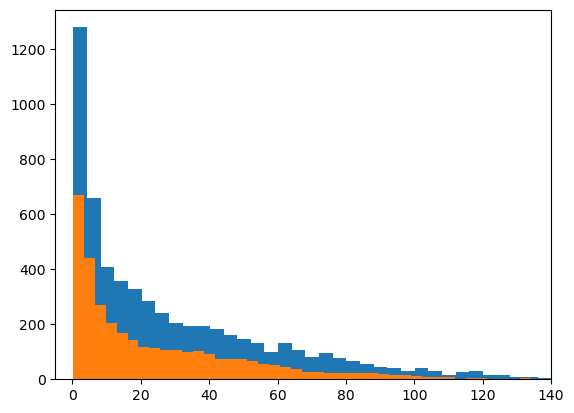

In [74]:
plt.hist(L147_velo, bins=50)
plt.hist(L176_velo, bins=50)
plt.xlim(-5,140);

In [70]:
engine_done = ['LB012001_12', 'LB012001_121']
'LB012001_1' in engine_done

False

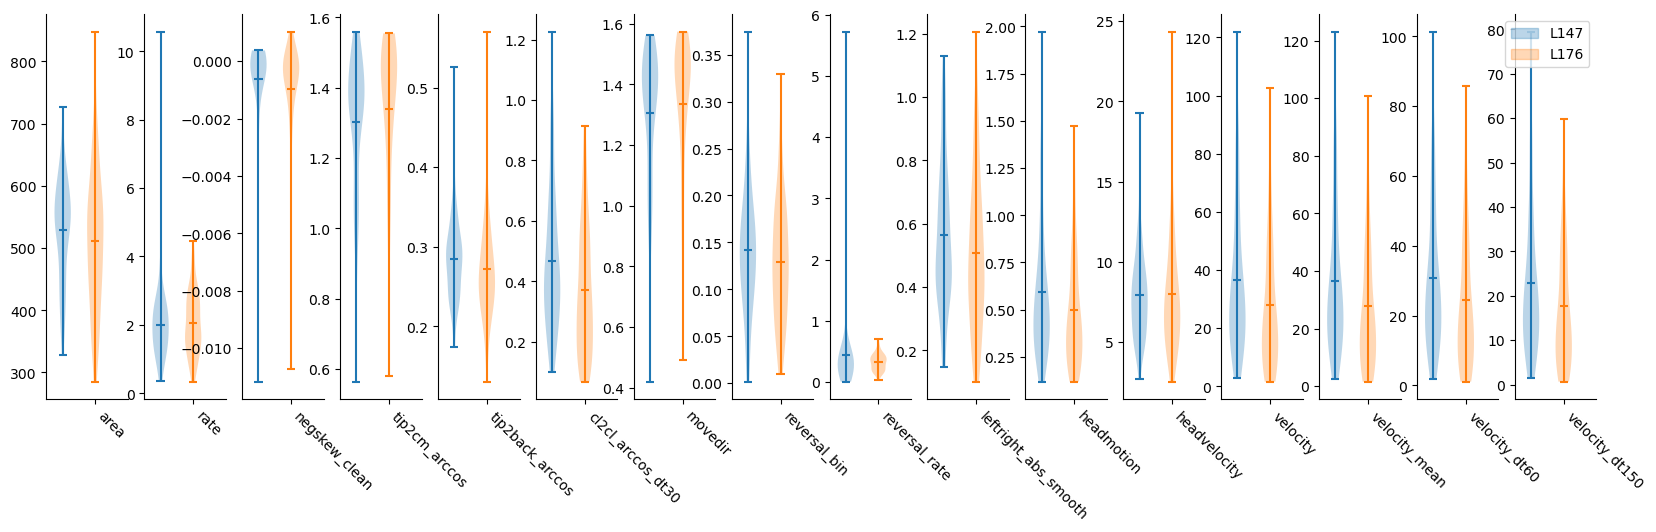

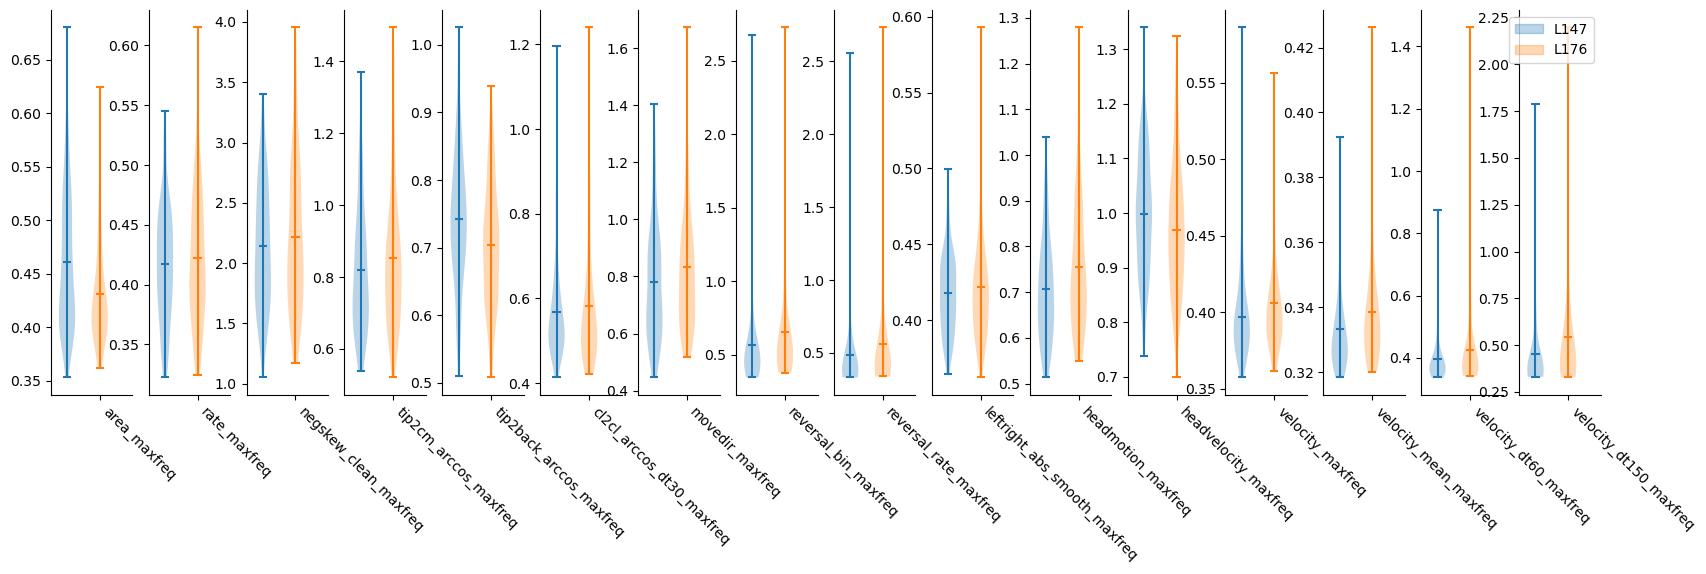

In [42]:
import matplotlib.patches as mpatches
for ftype, f_cols in {'Base': df_basecols, 'Maxfreq':df_maxfreqcols}.items():
    fig, axs = plt.subplots(1, len(f_cols), figsize=(20,5))
    labels = []
    for j, pat in enumerate(['L147', 'L176']):
        for i, col in enumerate(f_cols):
            violin = axs[i].violinplot(all_cond_mean.iloc[all_cond_mean.index.get_level_values(0) == pat][col].dropna(), positions=[j], showmeans=True)
            axs[i].set_xticks([1])
            axs[i].set_xticklabels([col], rotation=-45, ha='left')
            axs[i].spines['top'].set_visible(False)
            axs[i].spines['right'].set_visible(False)
            axs[i].set_xlim(-.5,2)
        labels.append((mpatches.Patch(color = violin["bodies"][0].get_facecolor()[0]), pat))
    plt.legend(*zip(*labels))
    plt.savefig(os.path.join('/gpfs/soma_fs/home/boeger/PpaPred/temp/', f'feature{ftype}_violin.png'))
    plt.show()

In [ ]:
for ftype, f_cols in {'Base': df_basecols, 'Maxfreq':df_maxfreqcols}.items():
    fig, axs = plt.subplots(1, len(f_cols), figsize=(4*len(f_cols),4), sharex=True)
    for i, col in enumerate(f_cols):
        for j, pat in enumerate(['L147', 'L176']):
            _df = all_cond_mean.iloc[all_cond_mean.index.get_level_values(0) == pat]
            axs[i].scatter(_df['velocity_dt60'], _df[col], label=pat)
            axs[i].set_xlabel('velocity dt60')
            axs[i].set_title(col)
    plt.legend()
    plt.savefig(os.path.join('/gpfs/soma_fs/home/boeger/PpaPred/temp/', f'feature{ftype}_veloCorr_mean.png'))
    plt.show()

In [ ]:
for ftype, f_cols in {'Base': df_basecols, 'Maxfreq':df_maxfreqcols}.items():
    fig, axs = plt.subplots(4, len(f_cols), figsize=(4*len(f_cols),8), sharex=True, sharey='col')
    _color = ['tab:blue', 'tab:orange']
    for i, col in enumerate(f_cols):
        for j, pat in enumerate(['L147', 'L176']):
            _df = all_cond.iloc[all_cond.index.get_level_values(0) == pat]
            axs[j,i].scatter(_df['velocity_dt60'], _df[col], alpha=.1, label=pat, c=_color[j])
            axs[2,i].scatter(_df['velocity_dt60'], _df[col], alpha=.1, label=pat, c=_color[j])
            axs[3,i].scatter(_df['velocity_dt60'], _df[col], alpha=.1, label=pat, c=_color[j], zorder=2-j)
        axs[-1,i].set_xlabel('velocity_dt60')
        axs[0,i].set_title(col)
    plt.legend()
    plt.savefig(os.path.join('/gpfs/soma_fs/home/boeger/PpaPred/temp/', f'feature{ftype}_veloCorr_5secRes.png'))
    plt.show()

In [ ]:
count = 0
for k, CL in CLines.items():
    XY = XYs[k]
    PG = pd.read_json(all_engine[k.split('.')[0]+'_features.json'], orient='split')
    if count == 8:
        break
    count += 1

In [ ]:
adjustCL = (CL-np.nanmean(CL)) + np.repeat(XY.reshape(XY.shape[0],1, XY.shape[1]), CL.shape[1], axis=1)
# nosetip vs cm over time
_, tip2cm_arccos, _ = al.AngleLen(adjustCL, XY, hypotenuse = "v1", over="space", v1_args=dict(diffindex=[5,0]))
# anterior vs posterior part
_, tip2back_arccos, _ = al.AngleLen(adjustCL, adjustCL, hypotenuse = "v1", over="space", v2_over='space', v1_args=dict(diffindex=[40,10]),v2_args=dict(diffindex=[-10,60]))
# cm vs cm over time
_, cl2cl_arccos_dt30, _ = al.AngleLen(adjustCL, hypotenuse = "v1", over="space", v1_args=dict(diffindex=[-10,10]), v2_diff=30)

# pharynx vs cm over time
_, movedir, _ = al.AngleLen(adjustCL, XY, hypotenuse = "v1", over='space', v1_args=dict(diffindex=[-10,10]))
reversal_bin = np.where(pd.DataFrame(movedir).rolling(10).mean() >= np.deg2rad(120), 1, 0)
reversal_events = np.clip(np.diff(reversal_bin, axis=0), 0, 1)
reversal_rate = pd.Series(reversal_events.squeeze()).rolling(30, center=True).apply(lambda w: np.mean(w)*30)

# assume that v2 (cm vector) is hypotenuse, makes sideways headmotion vector more realistic
# pharynx vs cm over time, with sin calculated
headmotion, leftright, _ = al.AngleLen(adjustCL, XY, hypotenuse = "v2", over='space', v2_args=dict(diff_step=1), angletype=np.arcsin)
headvelocity = abs(headmotion[:-1] - headmotion[1:])/(1/30)
leftright_abs_smooth = abs(pd.DataFrame(leftright).rolling(30).mean())


In [ ]:
PG.columns

In [ ]:
def CLtrajectory_plotter(CLine, XY, cluster_color=['k'], cluster_label=[0], y = None, fn='', figsize=(10,10)):
    fig, ax = plt.subplots(figsize=figsize)
    
    adjustCL = (CLine-np.nanmean(CLine))+np.repeat(XY.reshape(XY.shape[0],1,XY.shape[1]), CLine.shape[1], axis=1)# fits better than subtracting 50
    adjustXY = XY-np.nanmean(XY, axis=0)
    if y is not None:
        legend_elements = [Line2D([0], [0],color=cluster_color[i], label=cluster_label [i]) for i in cluster_label]
        for l in np.unique(y).astype(int):
            il = np.where(y == l)[0]
            ax.plot(*adjustCL[il].T, c=cluster_color[l], alpha = 0.1)
        ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1,1))
    else:
        ax.plot(*adjustCL.T, c=cluster_color[0], alpha = 0.1)
    ax.set_title(fn)
    ax.axis('equal')
    return fig

In [ ]:
CLtrajectory_plotter(CL, XY, figsize=(5,5));
plt.scatter(*pd.DataFrame(XY).dropna().iloc[0], marker='s', c='green', zorder=5)
plt.scatter(XY[::500,0],XY[::500,1], marker='.', c=range(len(XY[::500,0])), cmap='viridis', zorder=5)
plt.axis('equal')
plt.show();

In [ ]:
plt.plot(PG.velocity_dt60)
plt.show();

In [ ]:
plt.plot(pd.DataFrame(headvelocity).rolling(30).mean())
#plt.plot(PG.reversal_bin)
plt.show();

In [ ]:
cmap = plt.get_cmap('winter')
line_colors = cmap(pd.DataFrame(reversal_bin).rolling(2).mean())
plt.scatter(XY[-len(pd.DataFrame(reversal_bin)):,0], XY[-len(pd.DataFrame(reversal_bin)):,1], c=line_colors)
plt.axis('equal')
plt.show();

In [ ]:
def unitvector(xyarray, diff_step = 1):
    """
    Computes unit vectors and vector lengths from a 2D array of coordinates.
    
    Args:
        xyarray (np.ndarray): Input array of 2D coordinates (shape: [n_points, 2]).
    
    Returns:
        tuple: A tuple containing:
            - unit_vec (np.ndarray): Unit vectors corresponding to each coordinate.
            - vlen (np.ndarray): Vector lengths for each coordinate.
            - base (np.ndarray): Differences between consecutive coordinates.
    """
    base = xyarray[diff_step:] - xyarray[:-diff_step]
    vlen = np.linalg.norm(base, axis = 1).reshape(base.shape[0],1)
    unit_vec = np.divide(base,vlen)
    unit_vec = np.nan_to_num(unit_vec)
    return unit_vec, vlen/diff_step, base

def unitvector_space(xyarray, diffindex=[0,-1]):
    """
    Computes unit vectors and vector lengths for a given array of 2D points at a defined index.

    Args:
        xyarray (numpy.ndarray): A 2D array containing point coordinates.
        diffindex (list, optional): Indices for points to compute base vector from (default: [0, -1]).

    Returns:
        numpy.ndarray: Array of unit vectors.
        numpy.ndarray: Array of vector lengths.
        numpy.ndarray: Base vectors.
    """
    base = xyarray[:,diffindex[1]]-xyarray[:,diffindex[0]]
    vlen = np.linalg.norm(base, axis = 1).reshape(base.shape[0],1)
    unit_vec = np.divide(base,vlen)
    unit_vec = np.nan_to_num(unit_vec)
    return unit_vec, vlen, base


def AngleLen (v1, v2=None, hypotenuse = "v1", over="frames", v2_over = 'frames', v1_args={}, v2_args={}, v2_diff = 1, angletype=np.arccos):
    """
    Computes the length of the difference vector and the angle between two vectors.

    Args:
        v1 (numpy.ndarray): First vector (with 2D coordinates).
        v2 (numpy.ndarray, optional): Second vector (default: None).
        hypotenuse (str, optional): Determines which vector's length to use as the hypotenuse (default: "v1").
        over (str, optional): Specifies whether to compute over "frames" or "space" (default: "frames").
        **args: Additional arguments for unit vector computation, only applicable if over = "space".

    Returns:
        numpy.ndarray: Length of the difference vector.
        numpy.ndarray: Angle (in radians) between v1 and v2.
        numpy.ndarray: Difference vector (base vector).
    """
    func_dict = {'frames': unitvector,
                 'space': unitvector_space}
    
    v1_unitfunc = func_dict[over]
    v2_unitfunc = func_dict[v2_over]  
    v1_unit, v1_len, v1_diff = v1_unitfunc(v1,**v1_args)
    if not v2 is None:
        v2_unit, v2_len, v1_diff = v2_unitfunc(v2, **v2_args)
    else:
        v2_unit, v2_len, v1_diff = v1_unit[v2_diff:], v1_len[v2_diff:], v1_diff[v2_diff:]
    
    hyp = {"v1":v1_len, "v2":v2_len}
    hypo_len = hyp[hypotenuse]
    adjecent_len = hyp[[k for k in hyp.keys() if k != hypotenuse][0]]
    
    crop = min(len(v1_unit), len(v2_unit))
    
    dotProduct = v1_unit[:crop,0]*v2_unit[:crop,0] +v1_unit[:crop,1]*v2_unit[:crop,1]
    arccos = angletype(dotProduct) # mod of Vector is 1, so /mod can be left away  #arccos
    
    opposite_len = np.multiply(hypo_len[:crop].flatten(), abs(np.sin(arccos[:crop]))) #
    
    return opposite_len, arccos, v1_diff

In [ ]:
appended_df = pd.DataFrame([])

In [ ]:
features = ['velocity', 'area']
appended_df = pd.concat([appended_df, df[features]])

In [ ]:
quants = appended_df.quantile(.95).to_dict()

In [ ]:
{k: v/quants[k] for k,v in quants.items()}

In [ ]:
140/100